# Intro


# Setup

In [1]:
from importlib import reload
import sys
from time import sleep

import numpy as np
from matplotlib import pyplot as plt

# Reload already loaded modules
for m in ("AD5522_pi", "AD7685_pi", "AD5522dev_pi"):
    try:
        mod = sys.modules[m]
    except KeyError:
        pass
    else:
        reload(mod)
from AD5522dev_pi import AD5522dev
from AD5522_pi import MeasMode

In [2]:
board = AD5522dev(vref=5.0)

We can start anew or load already existing data from disk

In [3]:
try:
    # Load data from disk to extend it
    data = np.load("SalvagedDiodes.npz")["data"][()]
except:
    # Start anew
    data = {}

# Connection

* channel 1: anode
* DUTGND: cathode

Data is added with a name and plotted for verification.

## Measurement

In [8]:
def _block():
    print("Measuring")
    ch = board.channels[1]
    ch.currentrange = "extres"
    board.measchannel = 1

    def _setandmeasure(vset):
        meas = []
        
        ch.force = vset
        ch.mode = MeasMode.FVMV
        meas.append(board.measure(count=10)[0])
        ch.mode = MeasMode.FVMI
        meas.append(board.measure(count=500)[0])
        return meas

    vset = np.arange(-0.5, 0.5, 0.01)
    meas = np.array(tuple(_setandmeasure(v) for v in vset))

    ch.mode = MeasMode.HVMV
    ch.force = 0.0

    print("Done\n")
    return meas

data["STPS20H100CT"] = _d = _block()

Measuring
Done



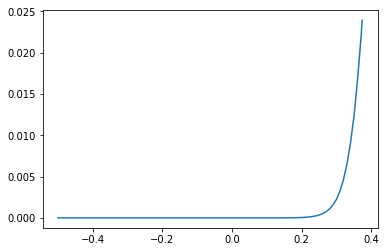

In [9]:
plt.plot(_d[:,0], _d[:,1])
plt.show()

In [12]:
np.savez("SalvagedDiodes", data=data)
print("Data saved")

Data saved
